### H(z) Reconstrution via Gaussian Process (GP)

### H(z) Reconstrution via Artificial Neural Network (ANN): ReFANN code

# Generating FRBs Mock data

#### DM_IGM reconstruction throught GP

#### DM_IGM reconstruction throught ANN

# Bayesian analyses and MCMC

### Defining priors

In [ ]:
from likelihood import Priors, LikelihoodFunction
from equations import DM_IGM_model

model = DM_IGM_model()

# Defining the prior intervals manually
intervals_constant = [(0, 1)]  # Interval for $f_{IGM}$
intervals_p2 = [(0, 1), (0, 5)]  # Intervals for $f_{IGM}$ and $\alpha$
intervals_p3 = [(0, 1), (0, 5)]  # Intervals for $f_{IGM}$ and $\alpha$
intervals_p4 = [(0, 1), (-5, 5)]  # Intervals for $f_{IGM}$ and $s$

# Creating specific instances of the priors
P_constant = Priors(['$f_{IGM}$'], intervals_constant)
P_p2 = Priors(['$f_{IGM}$', '$\\alpha$'], intervals_p2)
P_p3 = Priors(['$f_{IGM}$', '$\\alpha$'], intervals_p3)
P_p4 = Priors(['$f_{IGM}$', '$s$'], intervals_p4)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(lambda z, f_IGM: model.DM_IGM(z, f_IGM, None, 'constant'))
LF_p2 = LikelihoodFunction(lambda z, f_IGM, alpha: model.DM_IGM(z, f_IGM, alpha, 'p2'))
LF_p3 = LikelihoodFunction(lambda z, f_IGM, alpha: model.DM_IGM(z, f_IGM, alpha, 'p3'))
LF_p4 = LikelihoodFunction(lambda z, f_IGM, s: model.DM_IGM(z, f_IGM, s, 'p4'))

### Preparing the samples

In [10]:
from obs_data import H_data
import ultranest

z_values = H_data.z_func()
H_obs = H_data.H_func()
errors = H_data.errors_func()

# Configuring the ultranest samplers
sampler_constant = ultranest.ReactiveNestedSampler(P_constant.param_names,
    lambda params: LF_constant.log_likelihood(params, z_values, H_obs, errors), P_constant.prior_transform)

sampler_p2 = ultranest.ReactiveNestedSampler(P_p2.param_names,
    lambda params: LF_p2.log_likelihood(params, z_values, H_obs, errors), P_p2.prior_transform)

sampler_p3 = ultranest.ReactiveNestedSampler(P_p3.param_names,
    lambda params: LF_p3.log_likelihood(params, z_values, H_obs, errors), P_p3.prior_transform)

sampler_p4 = ultranest.ReactiveNestedSampler(P_p4.param_names,
    lambda params: LF_p4.log_likelihood(params, z_values, H_obs, errors), P_p4.prior_transform)


In [ ]:
result1 = sampler_constant.run(min_num_live_points=400)
sampler_constant.print_results()

In [ ]:
result2 = sampler_p2.run(min_num_live_points=400)
sampler_p2.print_results()

In [ ]:
result3 = sampler_p3.run(min_num_live_points=400)
sampler_p3.print_results()

In [ ]:
result4 = sampler_p4.run(min_num_live_points=400)
sampler_p4.print_results()

In [ ]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1 = result1['samples']
samples2 = result2['samples']
samples3 = result3['samples']
samples4 = result4['samples']

# Criando objetos MCSamples com os dados
labels1 = ['f_{IGM,0}']
names1 = ['f_IGM']
mcsamples1 = MCSamples(samples=samples1, names=names1, labels=labels1)

labels2 = ['f_{IGM,0}', '\\alpha']
names2 = ['f_IGM', 'alpha']
mcsamples2 = MCSamples(samples=samples2, names=names2, labels=labels2)
mcsamples3 = MCSamples(samples=samples3, names=names2, labels=labels2)

labels3 = ['f_{IGM,0}', 's']
names3 = ['f_IGM', 's']
mcsamples4 = MCSamples(samples=samples4, names=names3, labels=labels3)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples1, filled=True, contour_colors=['green'], 
                legend_labels=['P. 1'], 
                title_limit=1)
g.export('Figuras/H_p1.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples2, filled=True, contour_colors=['red'],
                legend_labels=['P. 2'], title_limit=1)
g.export('Figuras/H_p2.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples3, filled=True, contour_colors=['blue'],
                legend_labels=['P. 3'], title_limit=1)
g.export('Figuras/H_p3.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples4.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples4, filled=True, contour_colors=['purple'],
                legend_labels=['P. 4'], title_limit=1)
g.export('Figuras/H_p4.png', dpi=600)

In [ ]:
from ultranest.plot import PredictionBand
from equations import H_Model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values, y=H_obs, yerr=errors, marker='o', alpha=0.6, capsize=3, ls=' ', color='red', label='Data', ms=4)

z_test = np.linspace(0, 2, 100)

band = PredictionBand(z_test)
model = H_Model()
# go through the solutions
for f_IGM, alpha  in sampler_p3.results['samples']:
    # compute for each time the y value
    band.add(model.H_p(z_test, f_IGM, alpha, 'p3', 'ANN'))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit.png', format='png', dpi=600)

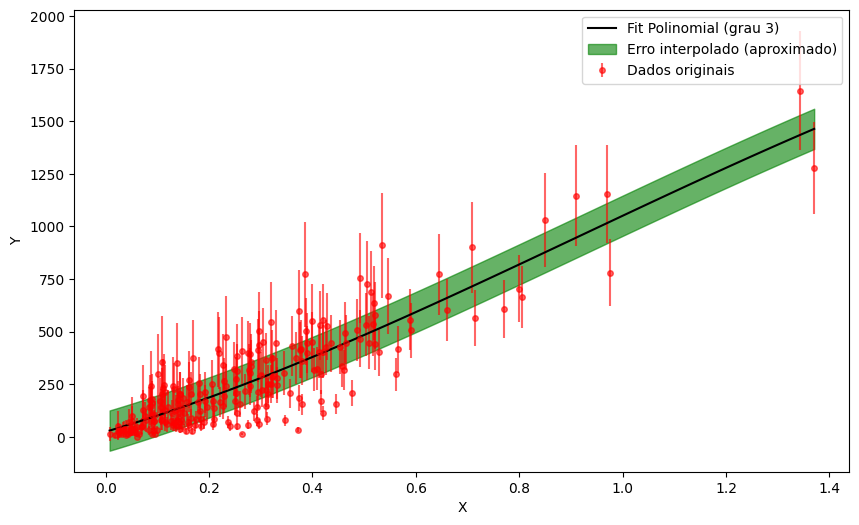

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load data: X, Y, and associated errors
DM_IGM = np.loadtxt('data/DM_IGM_detected_bingo+mirror_4m_alpha=-1.5_5yrs_with_erros.txt', skiprows=1)
x = DM_IGM[:, 0]
y = DM_IGM[:, 1]
y_err = DM_IGM[:, 2]

# Ajuste de um polinômio de grau 3 (por exemplo) aos dados
degree = 3  # Você pode ajustar o grau conforme necessário
coeffs = np.polyfit(x, y, degree)

# Cria a função polinomial a partir dos coeficientes ajustados
poly_fit = np.poly1d(coeffs)

# Avalia o polinômio ajustado para novos valores de x
x_new = np.linspace(min(x), max(x), 100)
y_new = poly_fit(x_new)

# Cubic spline interpolation
cs = CubicSpline(x_new, y_new)

# First derivative of the spline
cs_derivative = cs.derivative()

# Reconstructed function and its derivative
y_new = cs(x_new)
y_derivative_new = cs_derivative(x_new)

# Propagating errors (simplified for interpolation)
# Assuming independent errors and approximating them for the interpolated data
y_new_err = np.interp(x_new, x, y_err)  # Interpolating errors for y
y_derivative_err = np.gradient(y_new_err, x_new)  # Approximating error propagation for derivative

# Plot
plt.figure(figsize=(10, 6))

# Dados originais com erros
plt.errorbar(x, y, yerr=y_err, fmt='o', label='Dados originais', color='red', alpha=0.6, markersize=4)

# Polinômio ajustado
plt.plot(x_new, y_new, label=f'Fit Polinomial (grau {degree})', color='k')

# Área de erro aproximado usando o erro médio
plt.fill_between(x_new, y_new - y_err.mean(), y_new + y_err.mean(), color='green', alpha=0.6, label='Erro interpolado (aproximado)')

# Rótulos e detalhes do gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


(600.0, 1500.0)

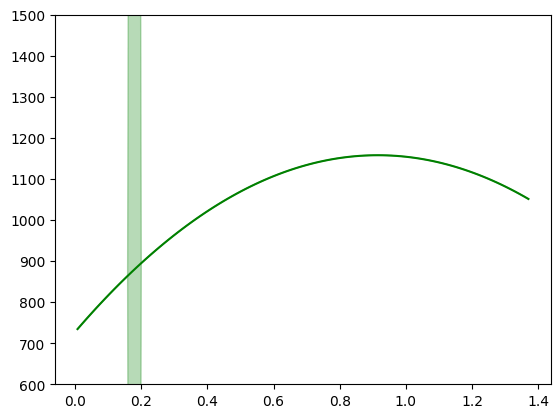

In [9]:
# Plot first derivative
plt.plot(x_new, y_derivative_new, label='First Derivative', color='green')
plt.fill_between(x_new, y_derivative_new - y_derivative_err, y_derivative_new + y_derivative_err, 
                 color='green', alpha=0.2, label=r'1$\sigma$ (derivative)')
plt.fill_between(x_new, y_derivative_new - 2*y_derivative_err, y_derivative_new + 2*y_derivative_err, 
                 color='green', alpha=0.1, label=r'2$\sigma$ (derivative)')
plt.ylim(ymin=600, ymax=1500)